In [ ]:
import numpy as np
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Regressão Linear

In [ ]:
X_b = np.array([[1,2],[1,5],[1,5.2],[1,10]])
y = np.array([-1,2,6,7])
print('Matriz X:\n',X_b, '\n\nLista de y:\n', y, '\n\nMatriz de X transposto:\n', X_b.T)

Matriz X:
 [[ 1.   2. ]
 [ 1.   5. ]
 [ 1.   5.2]
 [ 1.  10. ]] 

Lista de y:
 [-1  2  6  7] 

Matriz de X transposto:
 [[ 1.   1.   1.   1. ]
 [ 2.   5.   5.2 10. ]]


In [ ]:
x_inverso = np.linalg.inv(X_b.T.dot(X_b))
x_final = np.dot(X_b.T, y)
print('Produto Vetorial entre X e X transposto:\n', np.dot(X_b.T, X_b),
      '\n\n O inverso desse Produto Vetorial:\n', x_inverso,
      '\n\nProduto Vetorial entre X transposto e y:\n', x_final)

Produto Vetorial entre X e X transposto:
 [[  4.    22.2 ]
 [ 22.2  156.04]] 

 O inverso desse Produto Vetorial:
 [[ 1.18824246 -0.1690527 ]
 [-0.1690527   0.03045995]] 

Produto Vetorial entre X transposto e y:
 [ 14.  109.2]


In [ ]:
teta = np.dot(x_inverso, x_final)
resposta = np.dot(teta,X_b.T)
print('Resultado dos melhores coeficientes Theta\n', teta,
      '\n\nResposta da função a partir dos dados:\n', resposta)

Resultado dos melhores coeficientes Theta
 [-1.82515991  0.95948827] 

Resposta da função a partir dos dados:
 [0.09381663 2.97228145 3.1641791  7.76972281]


In [ ]:
MSE = ((1/len(y))*((resposta[0]-y[0])**2+(resposta[1]-y[1])**2+(resposta[2]-y[2])**2+(resposta[3]-y[3])**2))

print('Erro MSE associado à previsao dos dados a partir dos Mínimos Quadrados:\n', MSE,
      '\n\nComparar com o resultado feito por uma função do sklearn.metrics:\n', mean_squared_error(y, resposta, squared=True))


Erro MSE associado à previsao dos dados a partir dos Mínimos Quadrados:
 2.694029850746269 

Comparar com o resultado feito por uma função do sklearn.metrics:
 2.694029850746269


In [ ]:
# A biblioteca StatsModel nos dá mais informações estatísticas,
# porém o objetivo da dissertação foi concluído anteriormente,
# deixei aqui apenas para apresentar mais informações.
rl = sm.OLS(y, X_b)
res = rl.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.737
Model:                            OLS   Adj. R-squared:                  0.606
Method:                 Least Squares   F-statistic:                     5.609
Date:                Fri, 04 Aug 2023   Prob (F-statistic):              0.141
Time:                        17:26:39   Log-Likelihood:                -7.6578
No. Observations:                   4   AIC:                             19.32
Df Residuals:                       2   BIC:                             18.09
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.8252      2.530     -0.721      0.5

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


# Decision Tree

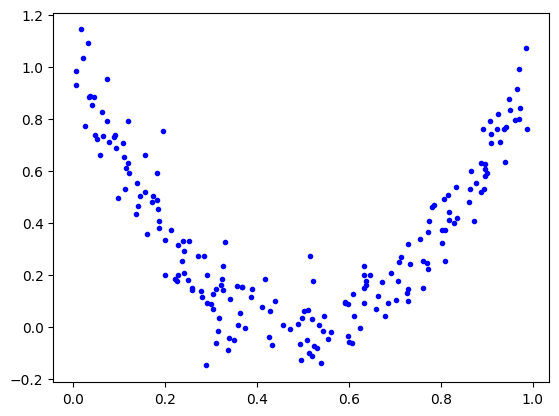

In [ ]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
import matplotlib.pyplot as plt
import os

np.random.seed(42)
m = 200
X = np.random.rand(m, 1)
y = 4 * (X - 0.5) ** 2
y = y + np.random.randn(m, 1) / 10

plt.plot(X, y, "b.")
plt.show()


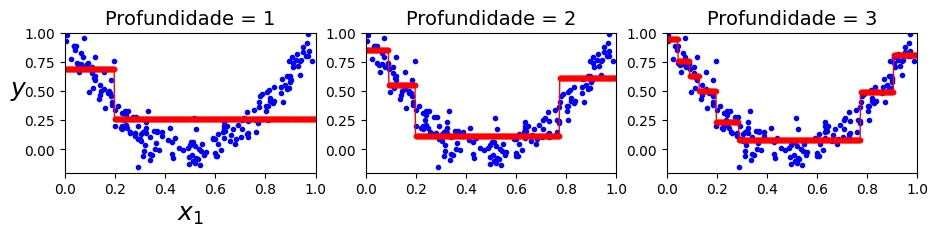

In [ ]:
tree_reg1 = DecisionTreeRegressor(random_state=42, max_depth=1)
tree_reg2 = DecisionTreeRegressor(random_state=42, max_depth=2)
tree_reg3 = DecisionTreeRegressor(random_state=42, max_depth=3)

tree_reg1.fit(X, y)
tree_reg2.fit(X, y)
tree_reg3.fit(X, y)

def plot_regression_predictions(tree_reg, X, y, axes=[0, 1, -0.2, 1], ylabel="$y$"):
    x1 = np.linspace(axes[0], axes[1], 500).reshape(-1, 1)
    y_pred = tree_reg.predict(x1)
    plt.axis(axes)
    if ylabel:
        plt.ylabel(ylabel, fontsize=18, rotation=0)
    plt.plot(X, y, "b.")
    plt.plot(x1, y_pred, "r.-", linewidth=1, label=r"$\hat{y}$")

plt.figure(figsize=(11, 4))
plt.subplot(231)
plot_regression_predictions(tree_reg1, X, y)
plt.title("Profundidade = 1", fontsize=14)
plt.xlabel("$x_1$", fontsize=18)

plt.subplot(232)
plot_regression_predictions(tree_reg2, X, y, ylabel=None)
plt.title("Profundidade = 2", fontsize=14)

plt.subplot(233)
plot_regression_predictions(tree_reg3, X, y, ylabel=None)
plt.title("Profundidade = 3", fontsize=14)

plt.show()

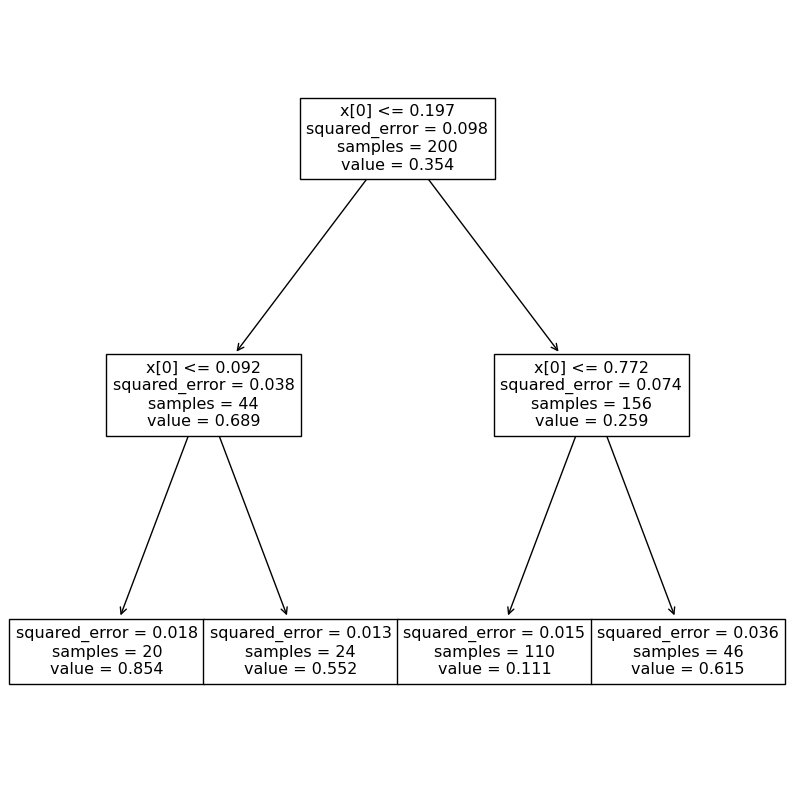

In [ ]:
plt.figure(figsize = (10,10))
tree.plot_tree(tree_reg2)
plt.show()

In [ ]:
mse1 = mean_squared_error(y, tree_reg1.predict(X), squared=True)
mse2 = mean_squared_error(y, tree_reg2.predict(X), squared=True)
mse3 = mean_squared_error(y, tree_reg3.predict(X), squared=True)

print('Valor MSE da árvore 1: ', mse1,
      '\nValor MSE da árvore 2: ', mse2,
      '\nValor MSE da árvore 3: ', mse3)

Valor MSE da árvore 1:  0.06604396667908144 
Valor MSE da árvore 2:  0.019890182015163304 
Valor MSE da árvore 3:  0.011060082653231142
